# Correlacion

Ajustar la funcion correspondiente a un conjunto de puntos para predecir posicion o valores.

## Correlacion Lineal 

y = ax + b

## Correcion Exponencial

y = e^ax + b

## Coeficiente de Correlacion de Pearson

r = Sum{(Xi - XMe)*(Yi - YMe)} / (srt(Sum(Xi - XMe)^2 * Sum(Yi - YMe)^2)


El valor del coeficiente si da un numero negativo quiere decir que existe una relacion pero inversa, y de manera contraria si da un valor positivo quiere decir que tiene un valor creciente.

Mientras mas cerca esta al 0 quiere decir que menos fuerte es la relacion existente de los valores.

https://medium.com/@hdezfloresmiguelangel/el-coeficiente-de-correlaci%C3%B3n-de-pearson-con-ejemplo-en-python-6e8588f67e35




In [13]:
import math

media = lambda x: sum(x)/len(x)

#@ require two arrays
def pearson(x,y):
    proX = media(x)
    proY = media(y)
    superior = 0
    for i in range(len(x)):
        superior = (x[i] - proX)*(y[i] - proY) + superior
    aux1 = 0
    aux2 = 0
    for i in range(len(x)):
        aux1 = (x[i] - proX)**2 + aux1
        aux2 = (y[i] - proY)**2 + aux2
    inferior = aux1 * aux2
    
    return superior/math.sqrt(inferior)

In [2]:
# DATASET
import numpy as np
x = []
y = []
for i in range(100):
    y.append(np.random.randint(0,100) * (i* 0.01))
    x.append(np.random.randint(0,100) * (i*0.01))

In [8]:
import matplotlib.pyplot as plt

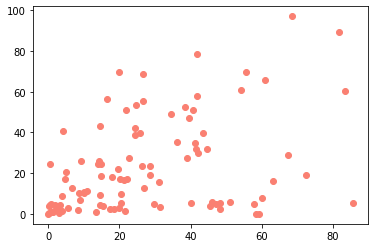

In [4]:
plt.scatter(x,y, c="salmon")

In [14]:
print("el coeficiente de correlacion de Pearson:",pearson(x,y))

el coeficiente de correlacion de Pearson: 0.416103373198237


## Ejemplo practico

Dataset mas famosos de correlacion

In [18]:
import pandas as pd
import numpy as np

In [26]:
data_set = pd.read_csv("../Machine Learning/python-ml-course/datasets/ads/Advertising.csv")

In [27]:
data_set.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Donde conviene mas hacer publicidad

In [28]:
pearson(data_set["TV"],data_set["Sales"])

0.782224424861606

Text(0, 0.5, 'Sales')

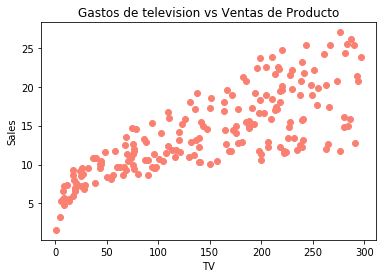

In [40]:
plt.scatter(data_set["TV"],data_set["Sales"], c="Salmon")
plt.title("Gastos de television vs Ventas de Producto")
plt.xlabel("TV")
plt.ylabel("Sales")

**Vamos a crear una forma mas generica para trabajar con dataframes**

In [34]:
def data_pears(data , x , y):
    data["up"] = (data[x] - np.mean(data[x])) * (data[y] - np.mean(data[y]))
    data["down_1"] = (data[x] - np.mean(data[x])) ** 2 
    data["down_2"] = (data[y] - np.mean(data[y])) ** 2
    return sum(data["up"])/np.sqrt(sum(data["down_1"])*sum(data["down_2"]))

In [35]:
cols = data_set.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [37]:
for x in cols:
    print(x + ", "+ "Sales" +": "+ str(data_pears(data_set,x,"Sales")))

TV, Sales: 0.782224424861606
Radio, Sales: 0.5762225745710553
Newspaper, Sales: 0.22829902637616525
Sales, Sales: 1.0


In [46]:
data_set = data_set.drop(["up","down_1","down_2"],axis=1)
data_set.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


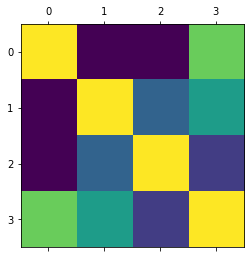

In [47]:
plt.matshow(data_set.corr())